# Plotting Word Clouds
This notebook aims to show the most common words in both the titles and the content of the reviews. First, we analyze the 5-star reviews to identify the aspects that customers appreciate the most. Then the same process is repeated for the 1-star reviews.

In [116]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords',quiet=True)
pass

In [117]:
df = pd.read_csv('../1-etl/reviews_clean.csv').fillna('')

In [118]:
def preprocess(corpus: str) -> dict[str, int]:
    corpus = corpus.lower()

    # Removing punctuation
    for punctuation in string.punctuation:
        corpus = corpus.replace(punctuation, '')

    # Splitting in tokens
    tokens = word_tokenize(corpus, language='english', preserve_line=True)

    # Removing stopwords
    stop_words = stopwords.words('english')+['printer', 'hp']
    tokens = list(filter(lambda x: x not in stop_words, tokens))

    # Calculating the words frequencies
    return {p: tokens.count(p) for p in tokens}

In [119]:
def word_cloud(titles: dict[str, int], contents: dict[str, int], title_prefix:str) -> None:
    wordcloud_titles = WordCloud(width=1800, height=1800, background_color="white",
                                 min_font_size=10).generate_from_frequencies(titles)
    wordcloud_contents = WordCloud(width=1800, height=1800, background_color="white",
                                   min_font_size=10).generate_from_frequencies(contents)

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    ax1.imshow(wordcloud_titles)
    ax1.set_title(f"({title_prefix}) Titles of the reviews")
    ax1.axis('off')
    ax2.imshow(wordcloud_contents)
    ax2.set_title(f"({title_prefix}) Contents of the reviews")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

In [120]:
corpus_titles_good = ' '.join(df[df['stars'] >= 5]['title'].to_list())
corpus_contents_good = ' '.join(df[df['stars'] >= 5]['content'].to_list())
print(len(corpus_titles_good), len(corpus_contents_good),
      corpus_contents_good[:80]+'...')

corpus_titles_bad = ' '.join(df[df['stars'] <= 1]['title'].to_list())
corpus_contents_bad = ' '.join(df[df['stars'] <= 1]['content'].to_list())
print(len(corpus_titles_bad), len(corpus_contents_bad),
      corpus_contents_bad[:80]+'...')

2523 38170 Home use and easy setup.Performs perfectly! I had an HP printer for years... Whe...
3379 91795 I've had my printer for a year. It stopped working and showed me a message to se...


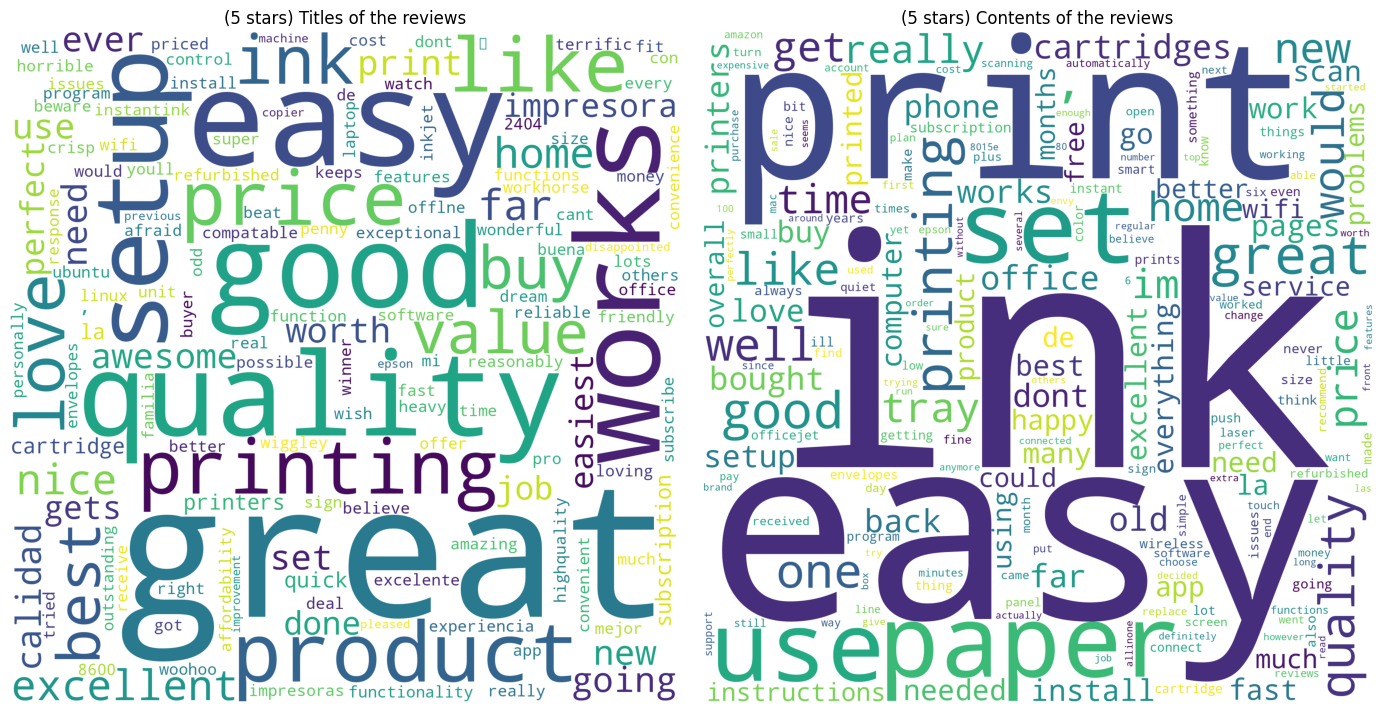

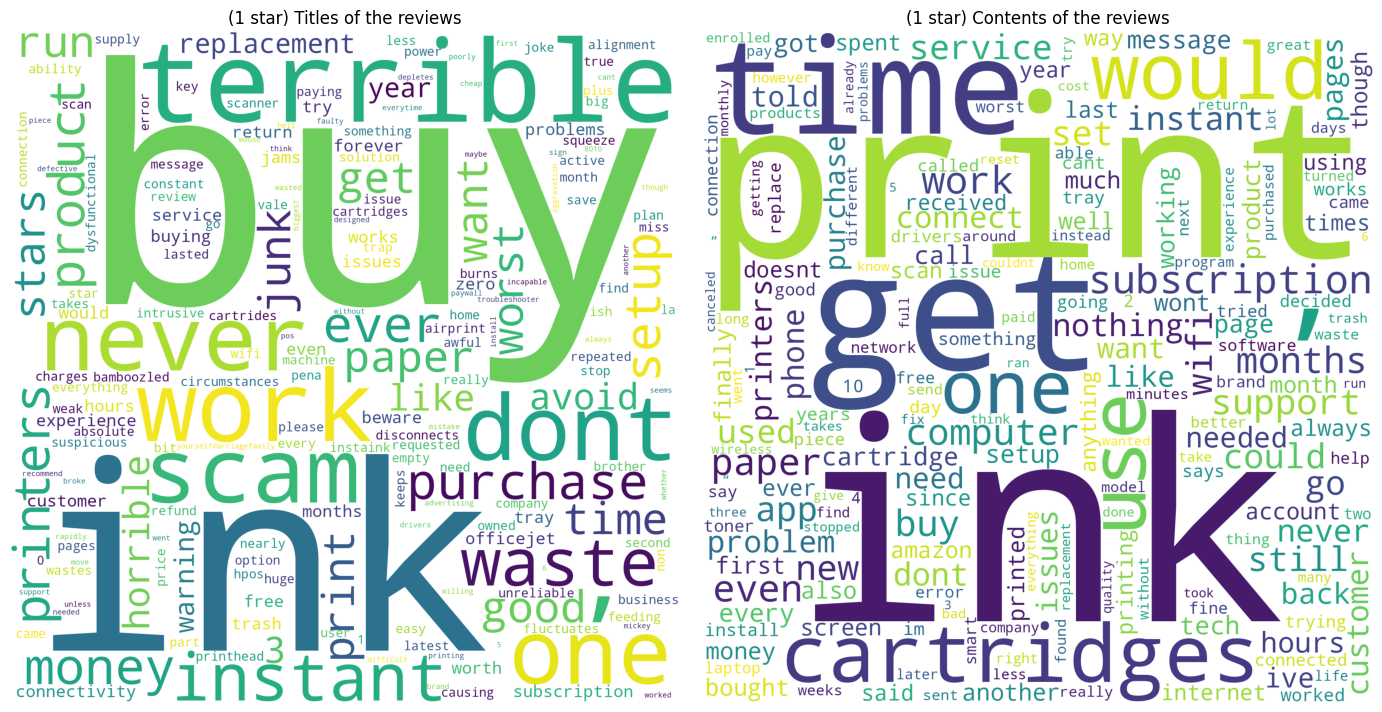

In [121]:
word_cloud(preprocess(corpus_titles_good),preprocess(corpus_contents_good),'5 stars')
word_cloud(preprocess(corpus_titles_bad),preprocess(corpus_contents_bad),'1 star')

Frequent words:
* *5 stars* - easy, quality, price, new, in time, office
* *1 star* - ink, cartridges, waste, scam, disconnects, paper, setup, subscription, wifi, support,app